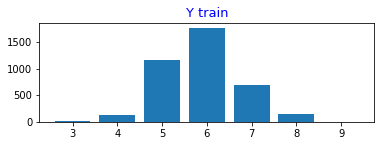

In [6]:
import _pickle as cp
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model


X, y = cp.load(open('winequality-white.pickle', 'rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

fig = plt.figure()


ax1 = fig.add_subplot(2,1,1) #first task
ax1.set_title('Y train', fontsize = 13, color = 'b')
frecv = [0]*7
note = [3,4,5,6,7,8,9] # np.hist
for i in y_train:
    frecv[int(i)-3]+=1
ax1.bar(x = note, height = frecv) 
plt.show()






In [7]:
mse = 0 # second task
exp = np.mean(y_train)
mse = np.mean((y_train - exp) ** 2)

print('MSE train for average model: '+str(mse))


mse = 0
exp = np.mean(y_test)

mse = mse = np.mean((y_test - exp) ** 2)


print('MSE test for average model: '+str(mse))

MSE train for average model: 0.7767772386501117
MSE test for average model: 0.8138390254060807


MSE train for linear regression is: 0.5602937036837484
MSE test for linear regression is: 0.5603456060459491


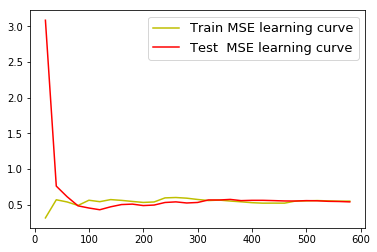

In [17]:
# third task
# Because in linear regression, there is no penalty considered for the weights (lambda = 0) 
# and so there is no point in standardizing to have the intercept (w0) = 0 
expectation = np.mean(X_train, axis = 0)
variance = np.var(X_train, axis = 0)
standard_dev = np.sqrt(variance) 


#now we standardize the training and test data (subtract expectation, divide by standard_dev)
X_train -= expectation
X_train /= standard_dev    
        
X_test -= expectation
X_test /= standard_dev    
        
X_train_extra = np.insert(X_train,0,1,axis=1)
X_test_extra = np.insert(X_test,0,1,axis=1)

#compute w and the mse train and test        
w = np.linalg.inv(X_train_extra.T.dot(X_train_extra)).dot(X_train_extra.T).dot(y_train)
ynew_train = X_train_extra.dot(w)
mse_new_train = getmse(X_train_extra, y_train,w)




print('MSE train for linear regression is: '+str(mse_new_train))

y_new_test = X_test_extra.dot(w)
mse_test = 0
for i  in range(N_test):
    mse_test += (y_new_test[i]-y_test[i])**2
mse_test/=N_test
print('MSE test for linear regression is: ' + str(mse_test))



def getmse(X, y, w): #task4
    yhat = X.dot(w)
    mse = 0
    mse = np.mean((y - yhat) ** 2)
    return mse

xs = [i for i in range(20,600,20)]                 
ys_train = []
ys_test = []
for i in xs:
    Xi = X_train_extra[:i]
    yi = y_train[:i]
    w = np.linalg.inv(Xi.T.dot(Xi)).dot(Xi.T).dot(yi)
    
    a = getmse(Xi,yi,w)
    b = getmse(X_test_extra[:i],y_test[:i],w)
    ys_train += [a]
    ys_test += [b]
    


plt.plot(xs,ys_train,'y', label = 'Train MSE learning curve')
plt.plot(xs, ys_test, 'r',label = 'Test  MSE learning curve')
plt.legend(loc = 'upper right', fontsize = 13) 
plt.show()

In [ ]:
lamb = np.array([0.01, 0.1, 1, 10, 100])
max_ridge = 0
max_lasso = 0
lambda_ridge = 0
lambda_lasso = 0


N_valid = int(0.8 * N_train)
X_valid = X_train[N_valid:]
X_train = X_train[:N_valid]
y_valid = y_train[N_valid:]
y_train = y_train[:N_valid]


for i in range(5):
    
    ridge = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', linear_model.Ridge(lamb[i]))])
    ridge = ridge.fit(X_train, y_train)

    lasso = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', linear_model.Lasso(lamb[i]))])
    lasso = lasso.fit(X_train, y_train)
    
    lasso_score = lasso.score(X_valid, y_valid)
    ridge_score = ridge.score(X_valid, y_valid)
    
    if(lasso_score > max_lasso):
        max_lasso = lasso_score
        lambda_lasso = lamb[i]
    if(ridge_score > max_ridge):
        max_ridge = ridge_score
        lambda_ridge = lamb[i]
        
ridge = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', linear_model.Ridge(lambda_ridge))])
ridge = ridge.fit(X_train, y_train)

lasso = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', linear_model.Lasso(lambda_lasso))])
lasso = lasso.fit(X_train, y_train)

y_ridge_train = ridge.predict(X_train)
y_lasso_train = lasso.predict(X_train)

error_ridge_train = np.mean((y_ridge_train - y_train) ** 2)
error_lasso_train = np.mean((y_lasso_train - y_train) ** 2)



y_ridge_test = ridge.predict(X_test)
y_lasso_test = lasso.predict(X_test)

error_ridge_test = np.mean((y_ridge_test - y_test) ** 2)
error_lasso_test = np.mean((y_lasso_test - y_test) ** 2)

print()
print('MSE train for ridge regression is: '+ str(error_ridge_train))
print('MSE test for ridge regression is: '+ str(error_ridge_test))
print('MSE train for lasso regression is: '+ str(error_lasso_train))
print('MSE test for lasso regression is: '+ str(error_lasso_test))
	
plt.show()
